In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
mpg = pd.read_csv("C:/Users/HP/Downloads/mpg_raw.csv")


In [7]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
#Dimension
mpg.shape

(398, 9)

In [9]:
#Structure
mpg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
#Summary
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
#Prt(ii)
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())

In [13]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
#part(iii)


In [16]:
#changing Continous variable into categorical variable
mpg['cylinders']=pd.Categorical(mpg['cylinders'])
mpg['displacement']=pd.Categorical(mpg['displacement'])



(array([ 27.,  95., 120.,  50.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

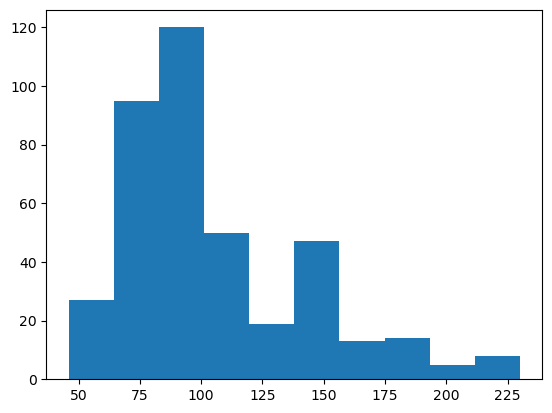

In [17]:
#Plotting histogram for continuous variable
plt.hist(mpg['horsepower'])

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

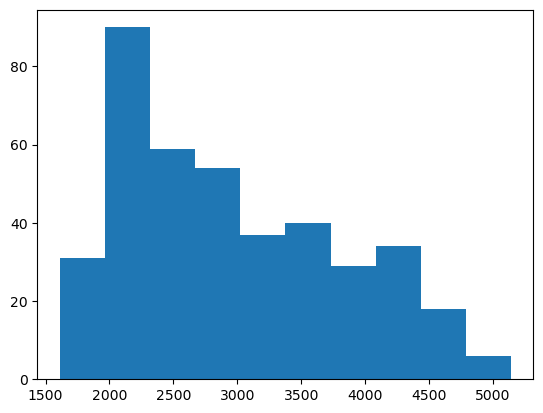

In [18]:
plt.hist(mpg['weight'])

<Axes: xlabel='horsepower'>

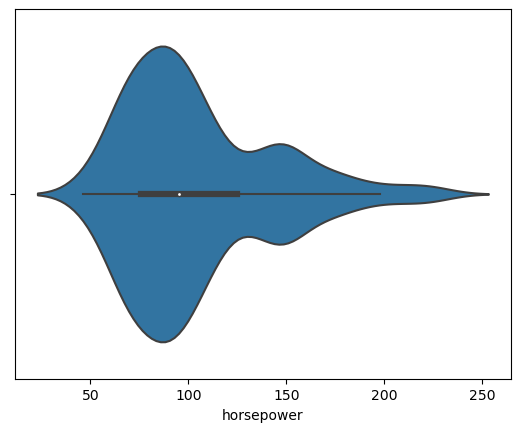

In [20]:
#part(iv)
#for single Numerical variable
sns.violinplot(x=mpg['horsepower'])


<Axes: xlabel='horsepower', ylabel='model_year'>

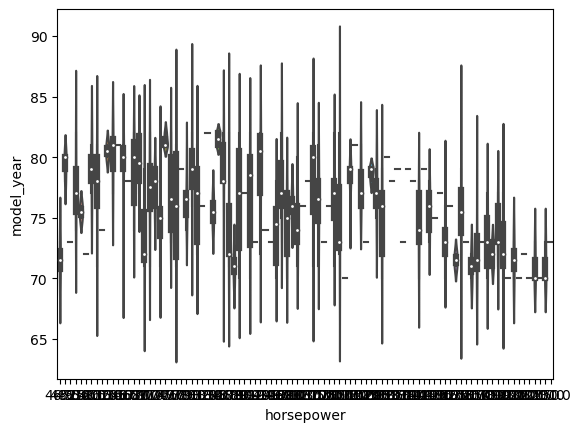

In [21]:
#for 2 Numerical variable
sns.violinplot(x='horsepower',y='model_year',data=mpg)

<Axes: >

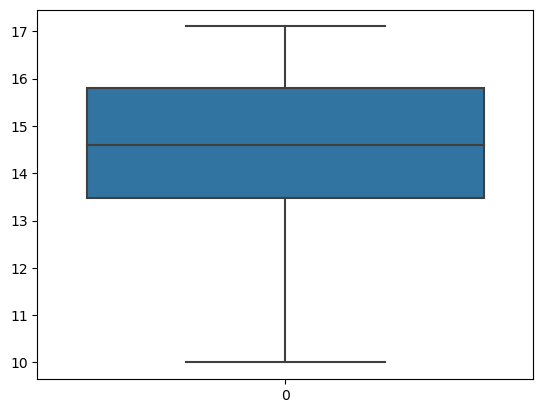

In [43]:
#part(iv)
#Plotting Box Plot
sns.boxplot(mpg['acceleration'])

In [40]:
#Part(v)
#Removing Outliers
Q1 = mpg['acceleration'].quantile(0.25)
Q3 = mpg['acceleration'].quantile(0.75)
IQR = Q3 - Q1
print("Q1: ",Q1,"\nQ3: ",Q3,"\nIQR: ",IQR)
Upper_Whisker = Q3 + (1.5*IQR)
Lower_Whisker = Q1 - (1.5*IQR)
print(Upper_Whisker,Lower_Whisker)

Q1:  13.3 
Q3:  15.8 
IQR:  2.5
19.55 9.55


In [41]:
mpg=mpg[mpg['acceleration']<Upper_Whisker]
mpg=mpg[mpg['acceleration']>Lower_Whisker]


<Axes: >

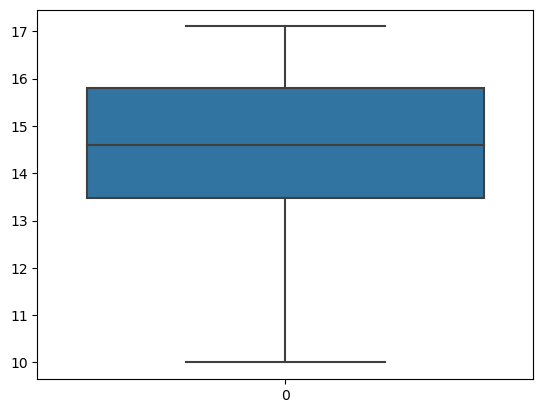

In [42]:
sns.boxplot(mpg['acceleration'])

C:\Users\HP\AppData\Local\Temp\ipykernel_17948\3047954679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mpg.corr())


<Axes: >

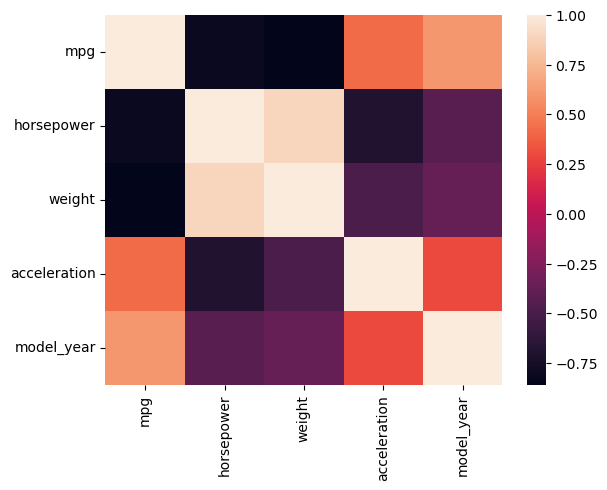

In [44]:
#part(vi)
sns.heatmap(mpg.corr())

In [ ]:
#Part(vii)

In [51]:
# First, install scikit-learn if you haven't already
!pip install scikit-learn

# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'horsepower' column
mpg['horsepower'] = scaler.fit_transform(mpg[['horsepower']])


In [52]:
# Display the 'mpg' DataFrame after standardization
print(mpg.head())


    mpg cylinders displacement  horsepower  weight  acceleration  model_year  \
0  18.0         8        307.0    0.506252    3504          12.0          70   
1  15.0         8        350.0    1.443790    3693          11.5          70   
2  18.0         8        318.0    1.041988    3436          11.0          70   
3  16.0         8        304.0    1.041988    3433          12.0          70   
4  17.0         8        302.0    0.774120    3449          10.5          70   

  origin                       name  
0    usa  chevrolet chevelle malibu  
1    usa          buick skylark 320  
2    usa         plymouth satellite  
3    usa              amc rebel sst  
4    usa                ford torino  
